# Matrix Multiplication Visualization: The Engine of Neural Networks

> *"Matrix multiplication is not just arithmetic - it's the fundamental operation that makes AI possible."*

Welcome to the heart of AI computation! Matrix multiplication powers every neural network, transformer, and deep learning model. This notebook will transform your understanding from mechanical computation to geometric intuition.

## What You'll Master

- **Geometric interpretation** of matrix multiplication
- **Step-by-step visualization** of the computation process
- **Neural network connections** and batch processing
- **Interactive exploration** of properties and patterns

---

In [25]:
# Essential imports for mathematical visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import time

# Set up beautiful plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Matrix multiplication laboratory initialized!")
print("Ready to explore the mathematics that powers AI...")

Matrix multiplication laboratory initialized!
Ready to explore the mathematics that powers AI...


---

# Chapter 1: Matrix Multiplication Mechanics

## The Rule: Dot Products in Disguise

Matrix multiplication $\mathbf{C} = \mathbf{A} \times \mathbf{B}$ is defined as:

$$c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}$$

**Translation**: Each element of $\mathbf{C}$ is the dot product between:
- Row $i$ of matrix $\mathbf{A}$
- Column $j$ of matrix $\mathbf{B}$

Let's see this in action!

Step-by-Step Matrix Multiplication
Computing C = A x B
A: (2, 3), B: (3, 2) → C: (2, 2)


C[0,0] = A[0,:] · B[:,0]
C[0,0] = [2 1 3] · [1 0 1]
C[0,0] = 2.0x1.0 + 1.0x0.0 + 3.0x1.0
C[0,0] = 5.00

C[0,1] = A[0,:] · B[:,1]
C[0,1] = [2 1 3] · [2 1 1]
C[0,1] = 2.0x2.0 + 1.0x1.0 + 3.0x1.0
C[0,1] = 8.00

C[1,0] = A[1,:] · B[:,0]
C[1,0] = [1 0 2] · [1 0 1]
C[1,0] = 1.0x1.0 + 0.0x0.0 + 2.0x1.0
C[1,0] = 3.00

C[1,1] = A[1,:] · B[:,1]
C[1,1] = [1 0 2] · [2 1 1]
C[1,1] = 1.0x2.0 + 0.0x1.0 + 2.0x1.0
C[1,1] = 4.00


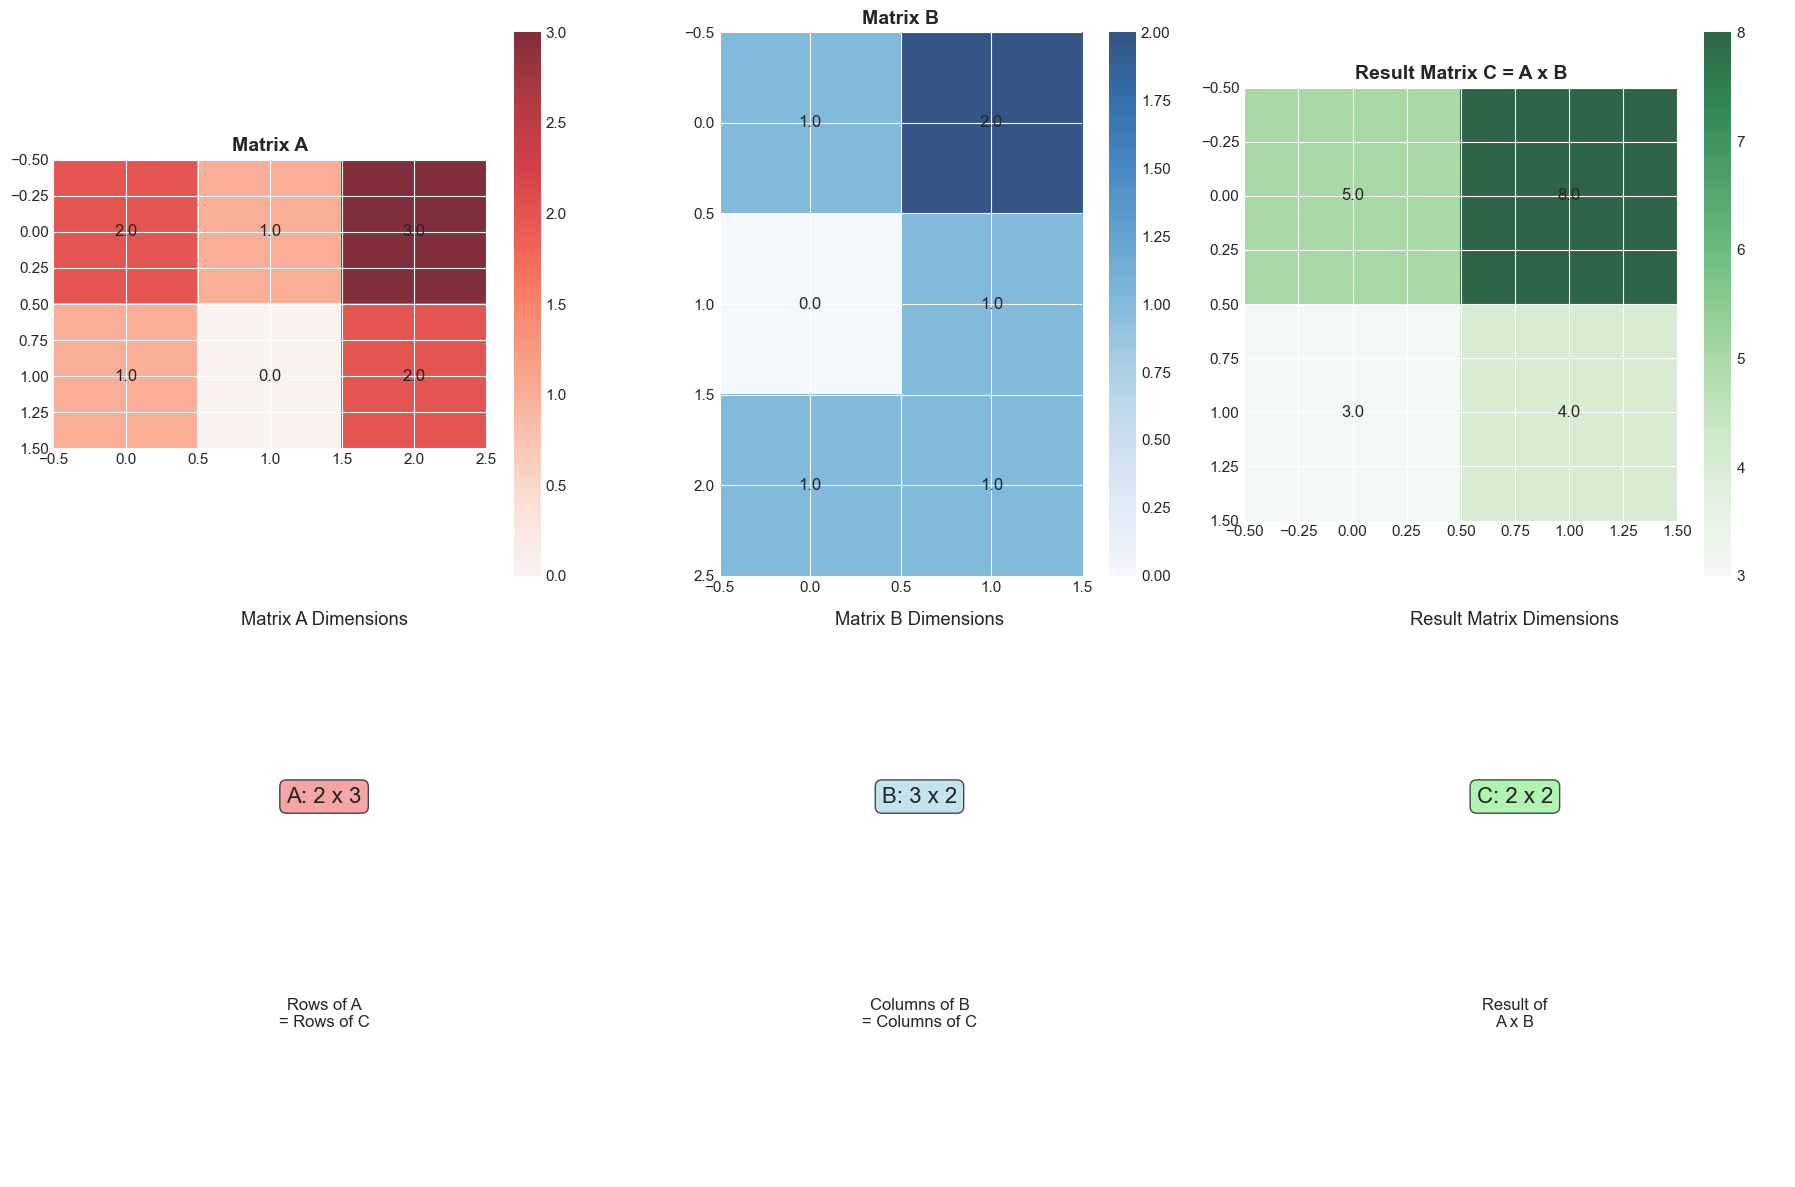


Verification with NumPy:
Our result:
[[5. 8.]
 [3. 4.]]
NumPy result:
[[5 8]
 [3 4]]
Match: True


In [26]:
def visualize_matrix_multiplication_step_by_step(A, B):
    """
    Visualize matrix multiplication element by element
    """
    m, n = A.shape
    n2, p = B.shape
    
    if n != n2:
        print(f"Cannot multiply: A is {m}x{n}, B is {n2}x{p}")
        return
    
    C = np.zeros((m, p))
    
    print(f"Computing C = A x B")
    print(f"A: {A.shape}, B: {B.shape} → C: {C.shape}")
    print("\n" + "="*50)
    
    # Create the visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Display matrices A and B
    im1 = axes[0,0].imshow(A, cmap='Reds', alpha=0.8)
    axes[0,0].set_title('Matrix A', fontsize=14, weight='bold')
    for i in range(m):
        for j in range(n):
            axes[0,0].text(j, i, f'{A[i,j]:.1f}', ha='center', va='center', fontsize=12)
    plt.colorbar(im1, ax=axes[0,0])
    
    im2 = axes[0,1].imshow(B, cmap='Blues', alpha=0.8)
    axes[0,1].set_title('Matrix B', fontsize=14, weight='bold')
    for i in range(n2):
        for j in range(p):
            axes[0,1].text(j, i, f'{B[i,j]:.1f}', ha='center', va='center', fontsize=12)
    plt.colorbar(im2, ax=axes[0,1])
    
    # Show the multiplication process
    for i in range(m):
        for j in range(p):
            # Compute dot product
            row_A = A[i, :]
            col_B = B[:, j]
            dot_product = np.dot(row_A, col_B)
            C[i, j] = dot_product
            
            print(f"\nC[{i},{j}] = A[{i},:] · B[:,{j}]")
            print(f"C[{i},{j}] = {row_A} · {col_B}")
            print(f"C[{i},{j}] = {' + '.join([f'{row_A[k]:.1f}x{col_B[k]:.1f}' for k in range(n)])}")
            print(f"C[{i},{j}] = {dot_product:.2f}")
    
    # Display result matrix C
    im3 = axes[0,2].imshow(C, cmap='Greens', alpha=0.8)
    axes[0,2].set_title('Result Matrix C = A x B', fontsize=14, weight='bold')
    for i in range(m):
        for j in range(p):
            axes[0,2].text(j, i, f'{C[i,j]:.1f}', ha='center', va='center', fontsize=12)
    plt.colorbar(im3, ax=axes[0,2])
    
    # Show dimensions
    axes[1,0].text(0.5, 0.7, f'A: {A.shape[0]} x {A.shape[1]}', 
                   ha='center', va='center', fontsize=16, 
                   bbox=dict(boxstyle="round", facecolor='lightcoral', alpha=0.7))
    axes[1,0].text(0.5, 0.3, 'Rows of A\n= Rows of C', 
                   ha='center', va='center', fontsize=12)
    axes[1,0].set_xlim(0, 1)
    axes[1,0].set_ylim(0, 1)
    axes[1,0].axis('off')
    axes[1,0].set_title('Matrix A Dimensions')
    
    axes[1,1].text(0.5, 0.7, f'B: {B.shape[0]} x {B.shape[1]}', 
                   ha='center', va='center', fontsize=16,
                   bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.7))
    axes[1,1].text(0.5, 0.3, 'Columns of B\n= Columns of C', 
                   ha='center', va='center', fontsize=12)
    axes[1,1].set_xlim(0, 1)
    axes[1,1].set_ylim(0, 1)
    axes[1,1].axis('off')
    axes[1,1].set_title('Matrix B Dimensions')
    
    axes[1,2].text(0.5, 0.7, f'C: {C.shape[0]} x {C.shape[1]}', 
                   ha='center', va='center', fontsize=16,
                   bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.7))
    axes[1,2].text(0.5, 0.3, 'Result of\nA x B', 
                   ha='center', va='center', fontsize=12)
    axes[1,2].set_xlim(0, 1)
    axes[1,2].set_ylim(0, 1)
    axes[1,2].axis('off')
    axes[1,2].set_title('Result Matrix Dimensions')
    
    plt.tight_layout()
    plt.show()
    
    return C

# Example matrices
A = np.array([[2, 1, 3],
              [1, 0, 2]])

B = np.array([[1, 2],
              [0, 1],
              [1, 1]])

print("Step-by-Step Matrix Multiplication")
result = visualize_matrix_multiplication_step_by_step(A, B)

# Verification with NumPy
numpy_result = A @ B
print(f"\nVerification with NumPy:")
print(f"Our result:\n{result}")
print(f"NumPy result:\n{numpy_result}")
print(f"Match: {np.allclose(result, numpy_result)}")

## Interactive Matrix Multiplication Explorer

Let's create an interactive tool to explore how matrix dimensions affect multiplication:

In [27]:
def interactive_matrix_multiplication(m=2, n=3, p=2, seed=42):
    """
    Interactive exploration of matrix multiplication with different dimensions
    """
    np.random.seed(seed)
    
    # Generate random matrices
    A = np.random.randint(-3, 4, size=(m, n))
    B = np.random.randint(-3, 4, size=(n, p))
    C = A @ B
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # Matrix A
    im1 = axes[0].imshow(A, cmap='Reds', alpha=0.8, aspect='auto')
    axes[0].set_title(f'Matrix A\n({m} × {n})', fontsize=14, weight='bold')
    for i in range(m):
        for j in range(n):
            axes[0].text(j, i, f'{A[i,j]}', ha='center', va='center', fontsize=10)
    
    # Matrix B
    im2 = axes[1].imshow(B, cmap='Blues', alpha=0.8, aspect='auto')
    axes[1].set_title(f'Matrix B\n({n} × {p})', fontsize=14, weight='bold')
    for i in range(n):
        for j in range(p):
            axes[1].text(j, i, f'{B[i,j]}', ha='center', va='center', fontsize=10)
    
    # Result C
    im3 = axes[2].imshow(C, cmap='Greens', alpha=0.8, aspect='auto')
    axes[2].set_title(f'Result C = A × B\n({m} × {p})', fontsize=14, weight='bold')
    for i in range(m):
        for j in range(p):
            axes[2].text(j, i, f'{C[i,j]}', ha='center', va='center', fontsize=10)
    
    # Computational complexity
    operations = m * n * p
    axes[3].text(0.5, 0.8, f'Dimensions Check:', ha='center', fontsize=14, weight='bold')
    axes[3].text(0.5, 0.65, f'A: {m} × {n}', ha='center', fontsize=12)
    axes[3].text(0.5, 0.55, f'B: {n} × {p}', ha='center', fontsize=12)
    axes[3].text(0.5, 0.45, f'C: {m} × {p}', ha='center', fontsize=12)
    axes[3].text(0.5, 0.3, f'Operations: {operations}', ha='center', fontsize=12, 
                bbox=dict(boxstyle="round", facecolor='yellow', alpha=0.7))
    axes[3].text(0.5, 0.2, f'({m} × {n} × {p})', ha='center', fontsize=10)
    axes[3].set_xlim(0, 1)
    axes[3].set_ylim(0, 1)
    axes[3].axis('off')
    axes[3].set_title('Complexity Analysis')
    
    plt.tight_layout()
    plt.show()
    
    # Print key insights
    print(f"Matrix Multiplication Analysis:")
    print(f"• Matrix A: {m} rows × {n} columns")
    print(f"• Matrix B: {n} rows × {p} columns")
    print(f"• Result C: {m} rows × {p} columns")
    print(f"• Total multiplications: {operations:,}")
    print(f"• Memory for result: {m * p} elements")
    
    if m == p:
        print(f"Square result matrix - could represent a transformation!")
    if n == 1:
        print(f"Matrix-vector multiplication - common in ML!")
    if m == 1:
        print(f"Row vector times matrix - computing weighted sums!")

# Create interactive widget
print("Interactive Matrix Multiplication Explorer")
print("Adjust dimensions to see how matrix multiplication works:")

interact(interactive_matrix_multiplication,
         m=widgets.IntSlider(value=2, min=1, max=4, description='A rows (m):'),
         n=widgets.IntSlider(value=3, min=1, max=4, description='A cols/B rows (n):'),
         p=widgets.IntSlider(value=2, min=1, max=4, description='B cols (p):'),
         seed=widgets.IntSlider(value=42, min=1, max=100, description='Random seed:'));

Interactive Matrix Multiplication Explorer
Adjust dimensions to see how matrix multiplication works:


interactive(children=(IntSlider(value=2, description='A rows (m):', max=4, min=1), IntSlider(value=3, descript…

---

# Chapter 2: Neural Network Connections

## Matrix Multiplication = Neural Network Layers

In neural networks, matrix multiplication is **everywhere**:

$$\mathbf{output} = \sigma(\mathbf{W} \mathbf{input} + \mathbf{b})$$

Where:
- $\mathbf{W}$: Weight matrix (learned parameters)
- $\mathbf{input}$: Input data or previous layer output
- $\mathbf{b}$: Bias vector
- $\sigma$: Activation function

Let's simulate a multi-layer neural network!

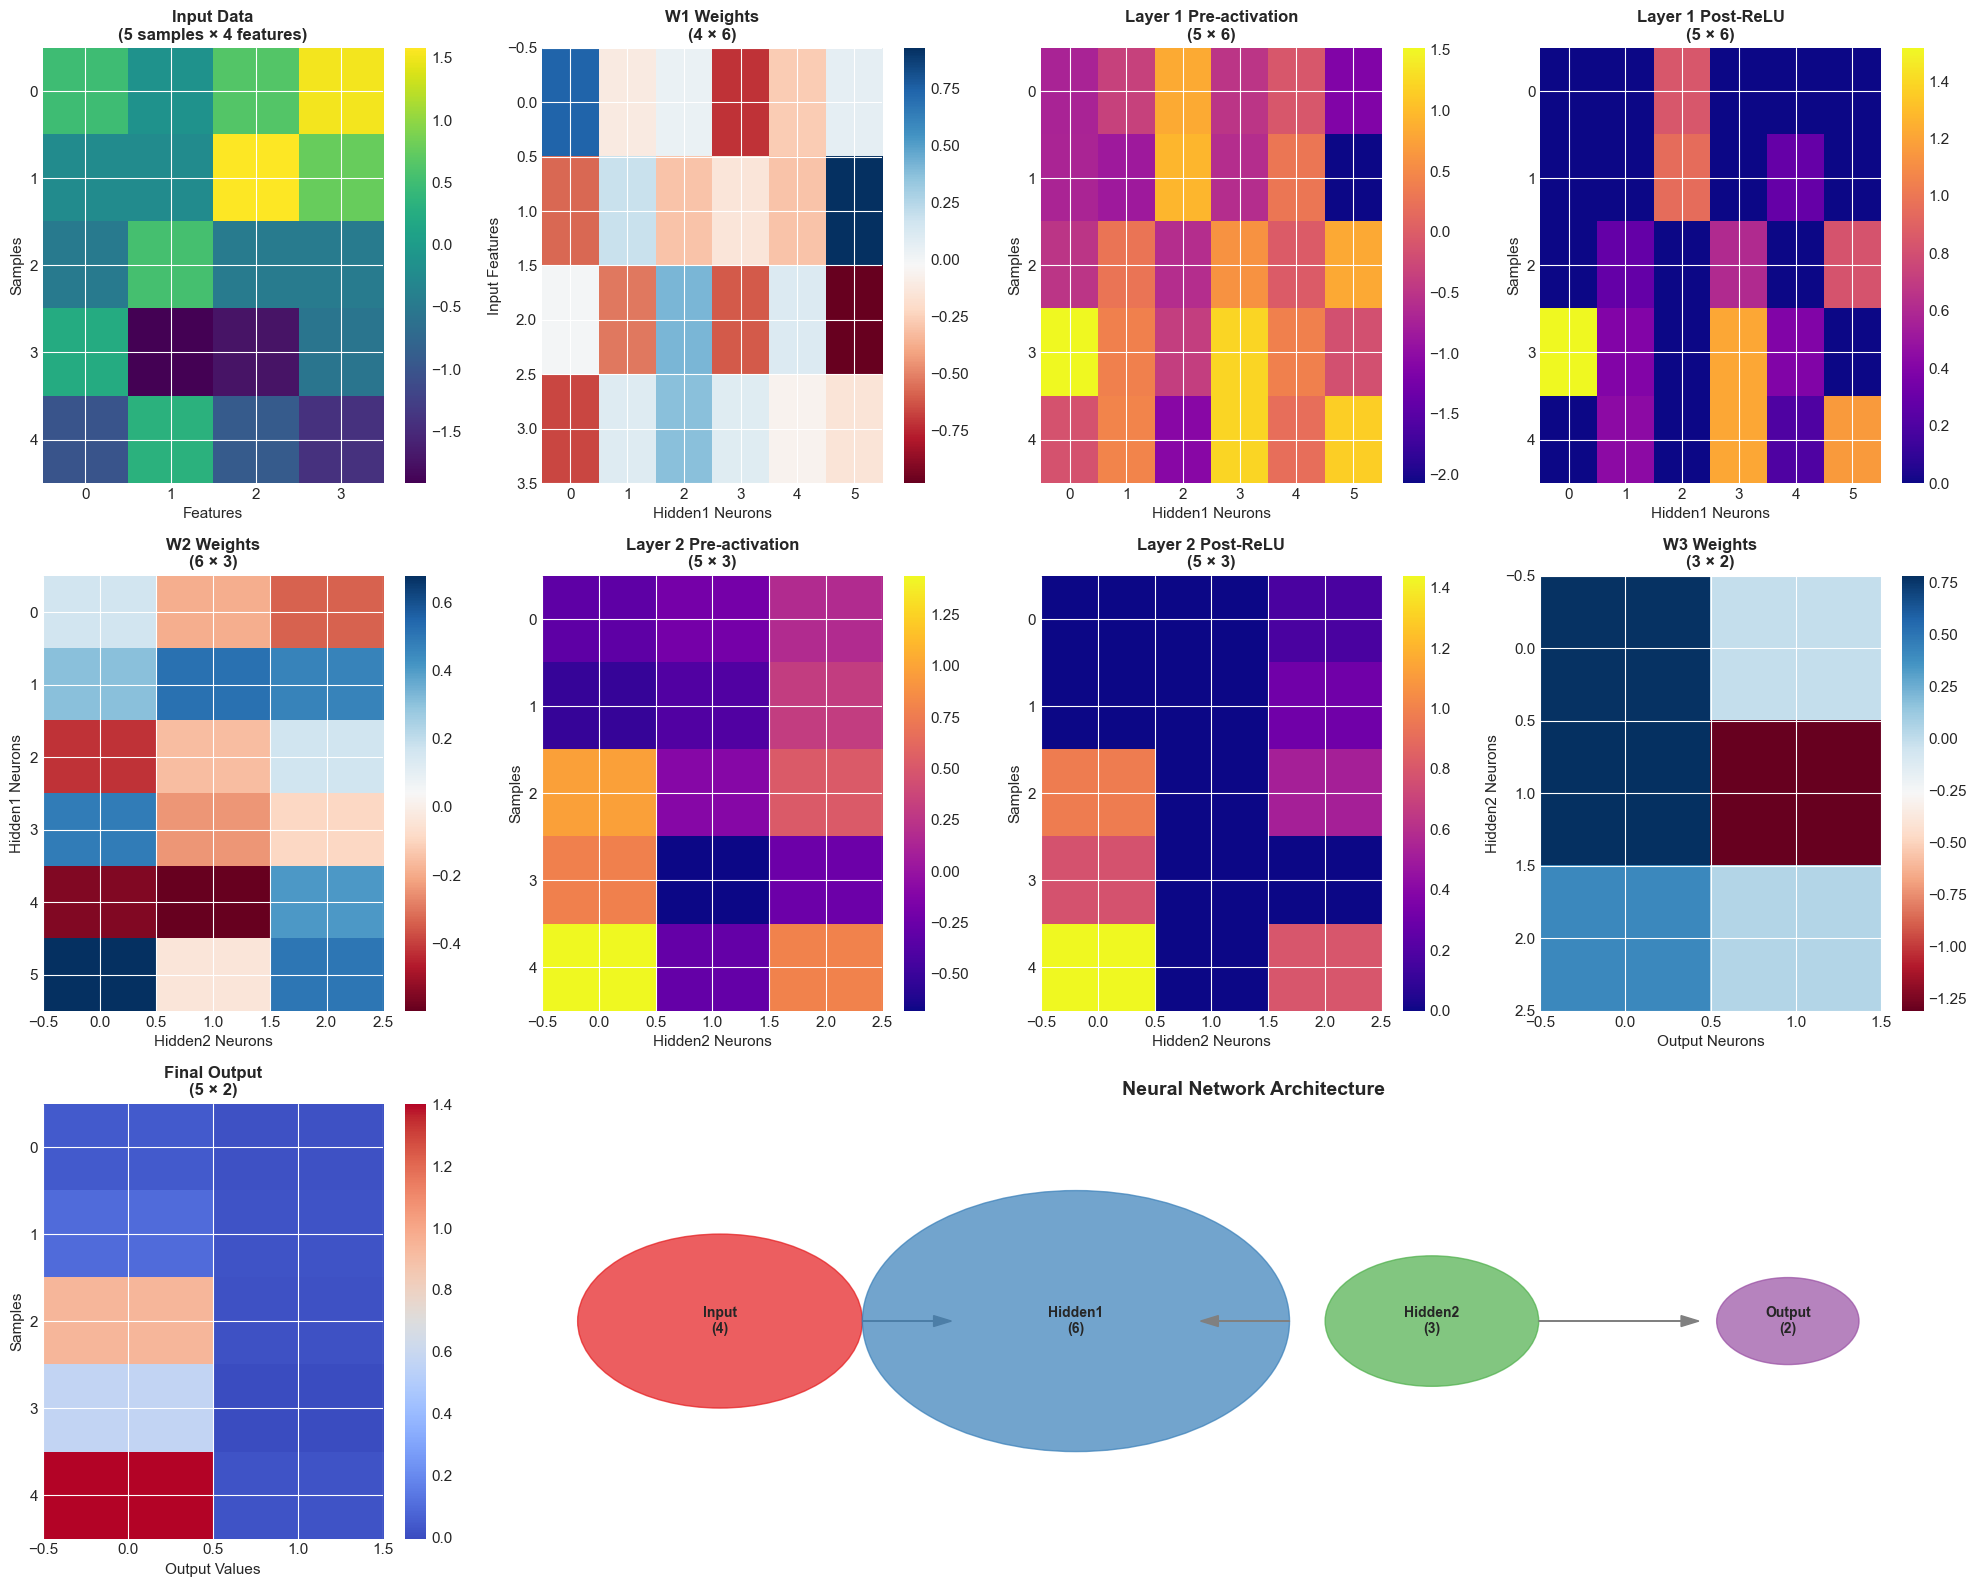

Neural Network Forward Pass Analysis:
Architecture: 4 → 6 → 3 → 2
Batch size: 5
Total parameters: 59
Operations per sample: 48
Operations for batch: 240

Matrix Multiplications:
1. Input × W1: (5, 4) × (4, 6) = (5, 6)
2. Hidden1 × W2: (5, 6) × (6, 3) = (5, 3)
3. Hidden2 × W3: (5, 3) × (3, 2) = (5, 2)


In [28]:
def simulate_neural_network_forward_pass():
    """
    Simulate a complete forward pass through a neural network
    """
    # Network architecture: 4 → 6 → 3 → 2
    input_size = 4
    hidden1_size = 6
    hidden2_size = 3
    output_size = 2
    batch_size = 5
    
    # Generate sample data
    np.random.seed(42)
    X = np.random.randn(batch_size, input_size)  # Input batch
    
    # Layer 1: Input → Hidden1
    W1 = np.random.randn(input_size, hidden1_size) * 0.5
    b1 = np.random.randn(hidden1_size) * 0.1
    z1 = X @ W1 + b1  # Linear transformation
    a1 = np.maximum(0, z1)  # ReLU activation
    
    # Layer 2: Hidden1 → Hidden2
    W2 = np.random.randn(hidden1_size, hidden2_size) * 0.5
    b2 = np.random.randn(hidden2_size) * 0.1
    z2 = a1 @ W2 + b2
    a2 = np.maximum(0, z2)  # ReLU activation
    
    # Layer 3: Hidden2 → Output
    W3 = np.random.randn(hidden2_size, output_size) * 0.5
    b3 = np.random.randn(output_size) * 0.1
    z3 = a2 @ W3 + b3
    # No activation for output layer (regression case)
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(20, 16))
    
    # Input data
    plt.subplot(3, 4, 1)
    plt.imshow(X, cmap='viridis', aspect='auto')
    plt.title(f'Input Data\n({batch_size} samples × {input_size} features)', fontsize=12, weight='bold')
    plt.ylabel('Samples')
    plt.xlabel('Features')
    plt.colorbar()
    
    # Layer 1 weights and transformations
    plt.subplot(3, 4, 2)
    plt.imshow(W1, cmap='RdBu', aspect='auto')
    plt.title(f'W1 Weights\n({input_size} × {hidden1_size})', fontsize=12, weight='bold')
    plt.ylabel('Input Features')
    plt.xlabel('Hidden1 Neurons')
    plt.colorbar()
    
    plt.subplot(3, 4, 3)
    plt.imshow(z1, cmap='plasma', aspect='auto')
    plt.title(f'Layer 1 Pre-activation\n({batch_size} × {hidden1_size})', fontsize=12, weight='bold')
    plt.ylabel('Samples')
    plt.xlabel('Hidden1 Neurons')
    plt.colorbar()
    
    plt.subplot(3, 4, 4)
    plt.imshow(a1, cmap='plasma', aspect='auto')
    plt.title(f'Layer 1 Post-ReLU\n({batch_size} × {hidden1_size})', fontsize=12, weight='bold')
    plt.ylabel('Samples')
    plt.xlabel('Hidden1 Neurons')
    plt.colorbar()
    
    # Layer 2 weights and transformations
    plt.subplot(3, 4, 5)
    plt.imshow(W2, cmap='RdBu', aspect='auto')
    plt.title(f'W2 Weights\n({hidden1_size} × {hidden2_size})', fontsize=12, weight='bold')
    plt.ylabel('Hidden1 Neurons')
    plt.xlabel('Hidden2 Neurons')
    plt.colorbar()
    
    plt.subplot(3, 4, 6)
    plt.imshow(z2, cmap='plasma', aspect='auto')
    plt.title(f'Layer 2 Pre-activation\n({batch_size} × {hidden2_size})', fontsize=12, weight='bold')
    plt.ylabel('Samples')
    plt.xlabel('Hidden2 Neurons')
    plt.colorbar()
    
    plt.subplot(3, 4, 7)
    plt.imshow(a2, cmap='plasma', aspect='auto')
    plt.title(f'Layer 2 Post-ReLU\n({batch_size} × {hidden2_size})', fontsize=12, weight='bold')
    plt.ylabel('Samples')
    plt.xlabel('Hidden2 Neurons')
    plt.colorbar()
    
    # Output layer
    plt.subplot(3, 4, 8)
    plt.imshow(W3, cmap='RdBu', aspect='auto')
    plt.title(f'W3 Weights\n({hidden2_size} × {output_size})', fontsize=12, weight='bold')
    plt.ylabel('Hidden2 Neurons')
    plt.xlabel('Output Neurons')
    plt.colorbar()
    
    plt.subplot(3, 4, 9)
    plt.imshow(z3, cmap='coolwarm', aspect='auto')
    plt.title(f'Final Output\n({batch_size} × {output_size})', fontsize=12, weight='bold')
    plt.ylabel('Samples')
    plt.xlabel('Output Values')
    plt.colorbar()
    
    # Network architecture diagram
    plt.subplot(3, 4, (10, 12))
    layers = [input_size, hidden1_size, hidden2_size, output_size]
    layer_names = ['Input\n(4)', 'Hidden1\n(6)', 'Hidden2\n(3)', 'Output\n(2)']
    x_positions = [0, 1, 2, 3]
    
    for i, (x, size, name) in enumerate(zip(x_positions, layers, layer_names)):
        # Draw layer as circle
        circle = plt.Circle((x, 0), size/10, color=plt.cm.Set1(i), alpha=0.7)
        plt.gca().add_patch(circle)
        plt.text(x, 0, name, ha='center', va='center', fontsize=10, weight='bold')
        
        # Draw connections
        if i < len(x_positions) - 1:
            plt.arrow(x + size/10, 0, 1 - 2*size/10, 0, 
                     head_width=0.05, head_length=0.05, fc='gray', ec='gray')
    
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 1)
    plt.title('Neural Network Architecture', fontsize=14, weight='bold')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print computational analysis
    total_params = W1.size + b1.size + W2.size + b2.size + W3.size + b3.size
    total_ops_per_sample = (input_size * hidden1_size + hidden1_size * hidden2_size + 
                           hidden2_size * output_size)
    total_ops_batch = total_ops_per_sample * batch_size
    
    print(f"Neural Network Forward Pass Analysis:")
    print(f"Architecture: {input_size} → {hidden1_size} → {hidden2_size} → {output_size}")
    print(f"Batch size: {batch_size}")
    print(f"Total parameters: {total_params:,}")
    print(f"Operations per sample: {total_ops_per_sample:,}")
    print(f"Operations for batch: {total_ops_batch:,}")
    print(f"\nMatrix Multiplications:")
    print(f"1. Input × W1: ({batch_size}, {input_size}) × ({input_size}, {hidden1_size}) = ({batch_size}, {hidden1_size})")
    print(f"2. Hidden1 × W2: ({batch_size}, {hidden1_size}) × ({hidden1_size}, {hidden2_size}) = ({batch_size}, {hidden2_size})")
    print(f"3. Hidden2 × W3: ({batch_size}, {hidden2_size}) × ({hidden2_size}, {output_size}) = ({batch_size}, {output_size})")
    
    return X, z3

# Run the simulation
input_data, final_output = simulate_neural_network_forward_pass()

## Batch Processing Power

One of the key advantages of matrix multiplication in neural networks is **batch processing**. Instead of processing one sample at a time, we can process many samples simultaneously!

### Sequential vs Batch Processing

Timing Comparison: Sequential vs Batch Processing
Batch size   1: Sequential 0.0000s, Batch 0.0000s, Speedup: 12.0x
Batch size  10: Sequential 0.0000s, Batch 0.0000s, Speedup: 3.0x
Batch size  50: Sequential 0.0001s, Batch 0.0000s, Speedup: 6.9x
Batch size 100: Sequential 0.0001s, Batch 0.0000s, Speedup: 7.8x
Batch size 500: Sequential 0.0007s, Batch 0.0002s, Speedup: 3.0x


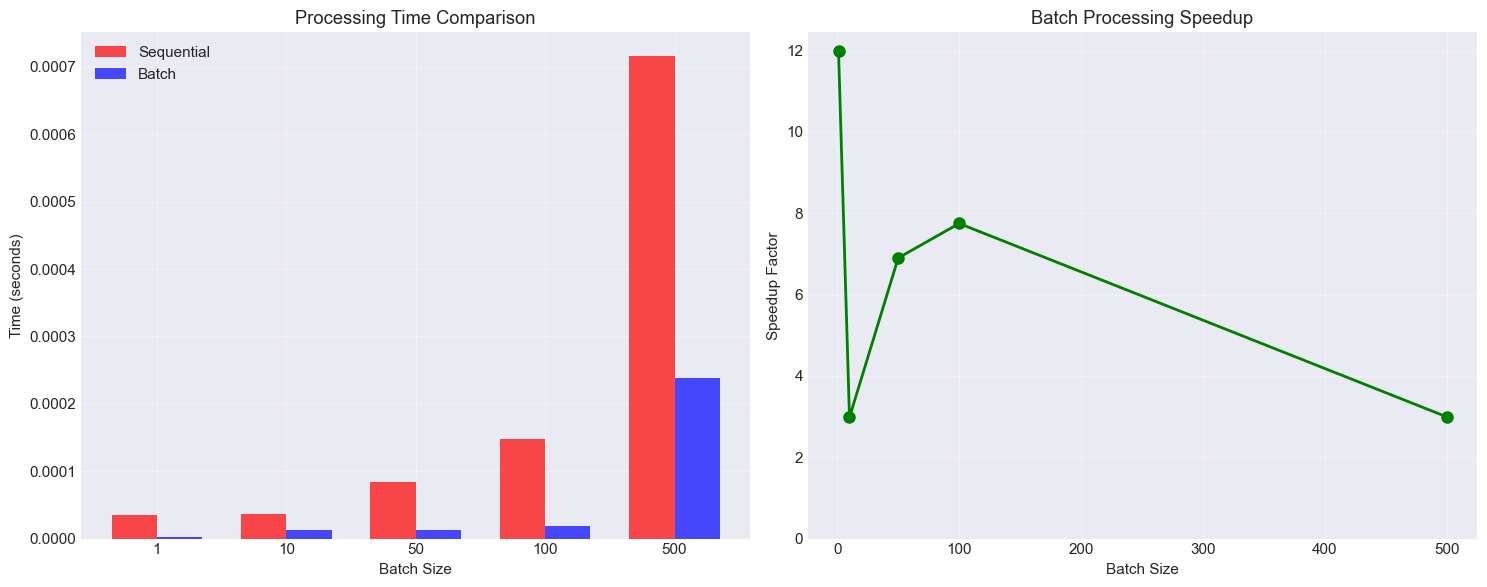


Key Insights:
• Batch processing is consistently faster
• Larger batches → better GPU/CPU utilization
• Maximum speedup observed: 12.0x
• Matrix operations are optimized in NumPy/BLAS


In [29]:
def compare_sequential_vs_batch_processing():
    """
    Compare sequential vs batch processing efficiency
    """
    # Setup
    input_size = 100
    output_size = 50
    batch_sizes = [1, 10, 50, 100, 500]
    
    # Weight matrix (same for all experiments)
    W = np.random.randn(input_size, output_size)
    
    times_sequential = []
    times_batch = []
    
    print("Timing Comparison: Sequential vs Batch Processing")
    print("=" * 60)
    
    for batch_size in batch_sizes:
        # Generate data
        X = np.random.randn(batch_size, input_size)
        
        # Sequential processing
        start_time = time.time()
        sequential_results = []
        for i in range(batch_size):
            result = X[i:i+1] @ W  # Process one sample at a time
            sequential_results.append(result)
        sequential_output = np.vstack(sequential_results)
        sequential_time = time.time() - start_time
        
        # Batch processing
        start_time = time.time()
        batch_output = X @ W  # Process all samples at once
        batch_time = time.time() - start_time
        
        times_sequential.append(sequential_time)
        times_batch.append(batch_time)
        
        # Verify results are identical
        assert np.allclose(sequential_output, batch_output), "Results don't match!"
        
        speedup = sequential_time / batch_time if batch_time > 0 else float('inf')
        print(f"Batch size {batch_size:3d}: Sequential {sequential_time:.4f}s, "
              f"Batch {batch_time:.4f}s, Speedup: {speedup:.1f}x")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Time comparison
    x = np.arange(len(batch_sizes))
    width = 0.35
    
    ax1.bar(x - width/2, times_sequential, width, label='Sequential', color='red', alpha=0.7)
    ax1.bar(x + width/2, times_batch, width, label='Batch', color='blue', alpha=0.7)
    
    ax1.set_xlabel('Batch Size')
    ax1.set_ylabel('Time (seconds)')
    ax1.set_title('Processing Time Comparison')
    ax1.set_xticks(x)
    ax1.set_xticklabels(batch_sizes)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Speedup
    speedups = [s/b if b > 0 else 0 for s, b in zip(times_sequential, times_batch)]
    ax2.plot(batch_sizes, speedups, 'go-', linewidth=2, markersize=8)
    ax2.set_xlabel('Batch Size')
    ax2.set_ylabel('Speedup Factor')
    ax2.set_title('Batch Processing Speedup')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nKey Insights:")
    print(f"• Batch processing is consistently faster")
    print(f"• Larger batches → better GPU/CPU utilization")
    print(f"• Maximum speedup observed: {max(speedups):.1f}x")
    print(f"• Matrix operations are optimized in NumPy/BLAS")

compare_sequential_vs_batch_processing()

---

# Chapter 3: Matrix Multiplication Properties

## Mathematical Properties That Matter

Understanding these properties helps in designing efficient neural network architectures:

1. **Associativity**: $(AB)C = A(BC)$
2. **Non-commutativity**: $AB \neq BA$ (generally)
3. **Distributivity**: $A(B+C) = AB + AC$
4. **Dimension compatibility**: Critical for deep networks

Exploring Matrix Multiplication Properties

1. ASSOCIATIVITY: (AB)C = A(BC)
(AB)C shape: (3, 3)
A(BC) shape: (3, 3)
Are they equal? True
Max difference: 0.0000000000

2. NON-COMMUTATIVITY: AB ≠ BA (generally)
P @ Q:
[[ -8 -15   4]
 [-15   0  -6]
 [  5  -1   3]]
Q @ P:
[[ 11  -3   8]
 [ -6 -15   6]
 [  6   8  -1]]
Are PQ and QP equal? False
Difference norm: 32.70

3. DISTRIBUTIVITY: A(B+D) = AB + AD
A(B+D) shape: (3, 2)
AB + AD shape: (3, 2)
Are they equal? True
Max difference: 0.0000000000

4. IDENTITY MATRIX: AI = IA = A
Original M:
[[-3  0 -1]
 [ 2 -3  0]
 [-1 -1 -1]]
M @ I equals M? True
I @ M equals M? True


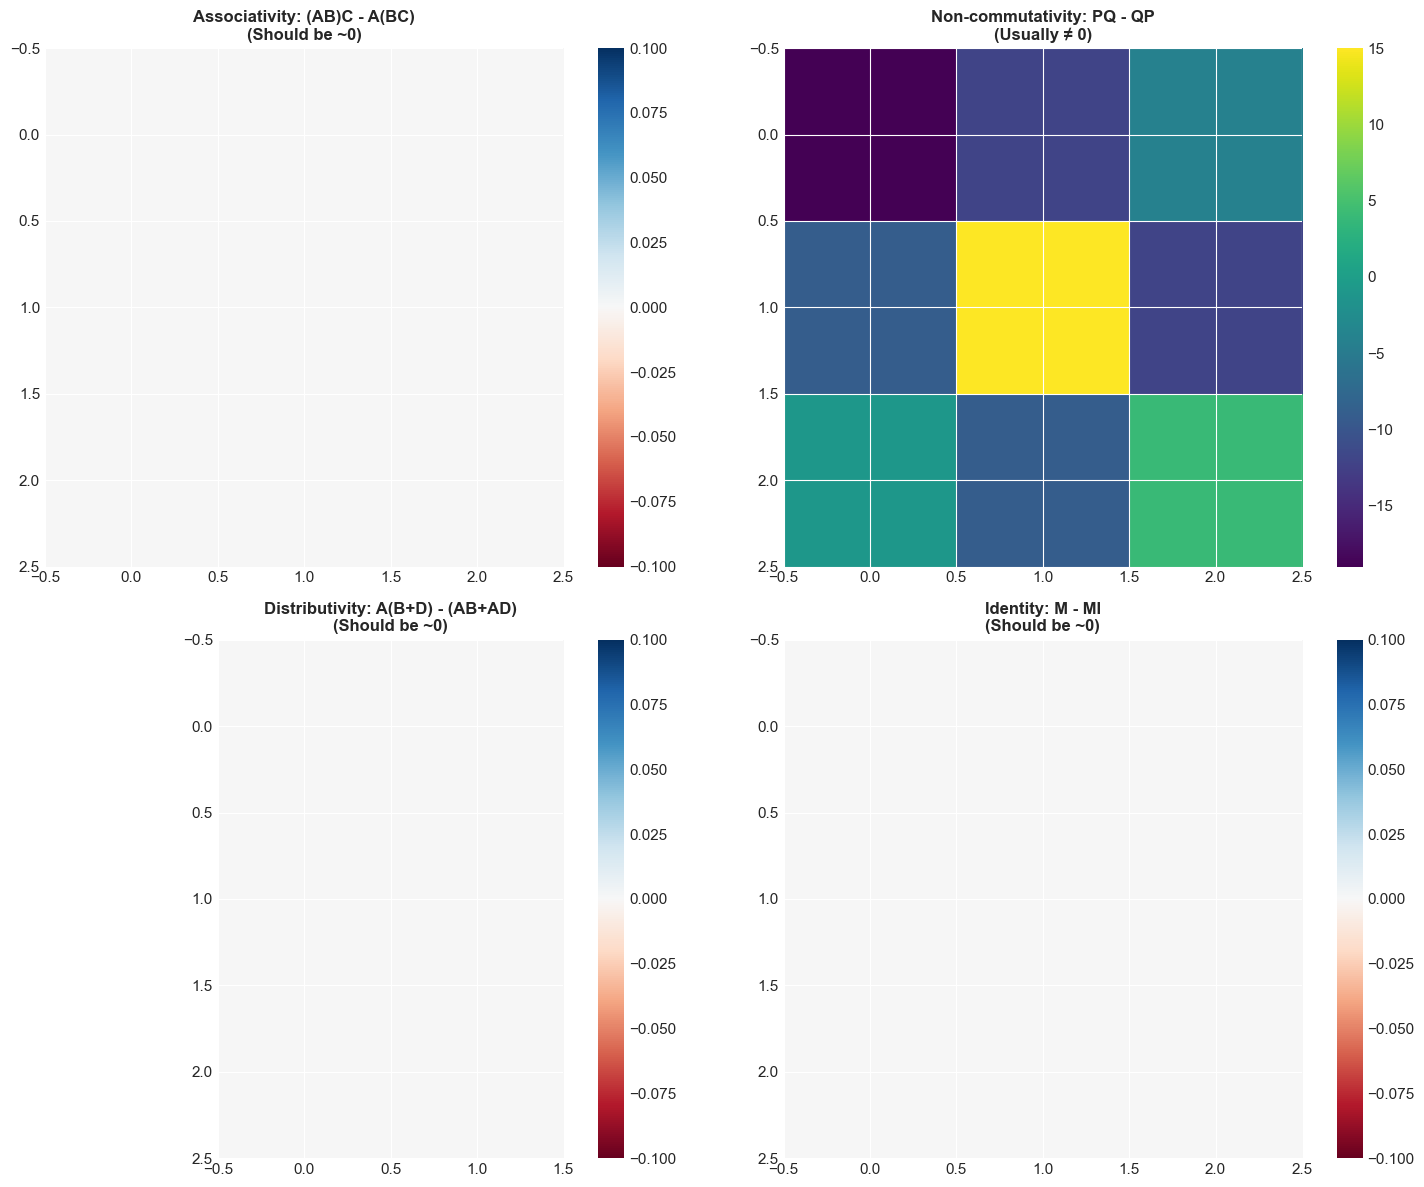

In [30]:
def explore_matrix_properties():
    """
    Explore key properties of matrix multiplication
    """
    # Generate test matrices
    np.random.seed(123)
    A = np.random.randint(-3, 4, (3, 4))
    B = np.random.randint(-3, 4, (4, 2))
    C = np.random.randint(-3, 4, (2, 3))
    D = np.random.randint(-3, 4, (4, 2))
    
    print("Exploring Matrix Multiplication Properties")
    print("=" * 50)
    
    # Property 1: Associativity
    print("\n1. ASSOCIATIVITY: (AB)C = A(BC)")
    AB_C = (A @ B) @ C
    A_BC = A @ (B @ C)
    print(f"(AB)C shape: {AB_C.shape}")
    print(f"A(BC) shape: {A_BC.shape}")
    print(f"Are they equal? {np.allclose(AB_C, A_BC)}")
    print(f"Max difference: {np.max(np.abs(AB_C - A_BC)):.10f}")
    
    # Property 2: Non-commutativity
    print("\n2. NON-COMMUTATIVITY: AB ≠ BA (generally)")
    # Need square matrices for both orders to be defined
    P = np.random.randint(-3, 4, (3, 3))
    Q = np.random.randint(-3, 4, (3, 3))
    PQ = P @ Q
    QP = Q @ P
    print(f"P @ Q:\n{PQ}")
    print(f"Q @ P:\n{QP}")
    print(f"Are PQ and QP equal? {np.allclose(PQ, QP)}")
    print(f"Difference norm: {np.linalg.norm(PQ - QP):.2f}")
    
    # Property 3: Distributivity
    print("\n3. DISTRIBUTIVITY: A(B+D) = AB + AD")
    A_BD = A @ (B + D)
    AB_AD = (A @ B) + (A @ D)
    print(f"A(B+D) shape: {A_BD.shape}")
    print(f"AB + AD shape: {AB_AD.shape}")
    print(f"Are they equal? {np.allclose(A_BD, AB_AD)}")
    print(f"Max difference: {np.max(np.abs(A_BD - AB_AD)):.10f}")
    
    # Property 4: Identity matrix
    print("\n4. IDENTITY MATRIX: AI = IA = A")
    I = np.eye(3)
    M = np.random.randint(-3, 4, (3, 3))
    MI = M @ I
    IM = I @ M
    print(f"Original M:\n{M}")
    print(f"M @ I equals M? {np.allclose(M, MI)}")
    print(f"I @ M equals M? {np.allclose(M, IM)}")
    
    # Visualize the properties
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Associativity visualization
    diff1 = AB_C - A_BC
    im1 = ax1.imshow(diff1, cmap='RdBu', vmin=-0.1, vmax=0.1)
    ax1.set_title('Associativity: (AB)C - A(BC)\n(Should be ~0)', fontsize=12, weight='bold')
    plt.colorbar(im1, ax=ax1)
    
    # Non-commutativity visualization
    diff2 = PQ - QP
    im2 = ax2.imshow(diff2, cmap='viridis')
    ax2.set_title('Non-commutativity: PQ - QP\n(Usually ≠ 0)', fontsize=12, weight='bold')
    plt.colorbar(im2, ax=ax2)
    
    # Distributivity visualization
    diff3 = A_BD - AB_AD
    im3 = ax3.imshow(diff3, cmap='RdBu', vmin=-0.1, vmax=0.1)
    ax3.set_title('Distributivity: A(B+D) - (AB+AD)\n(Should be ~0)', fontsize=12, weight='bold')
    plt.colorbar(im3, ax=ax3)
    
    # Identity property visualization
    diff4 = M - MI
    im4 = ax4.imshow(diff4, cmap='RdBu', vmin=-0.1, vmax=0.1)
    ax4.set_title('Identity: M - MI\n(Should be ~0)', fontsize=12, weight='bold')
    plt.colorbar(im4, ax=ax4)
    
    plt.tight_layout()
    plt.show()

explore_matrix_properties()

## Matrix Multiplication as Data Transformation

Let's visualize how matrix multiplication transforms data patterns:

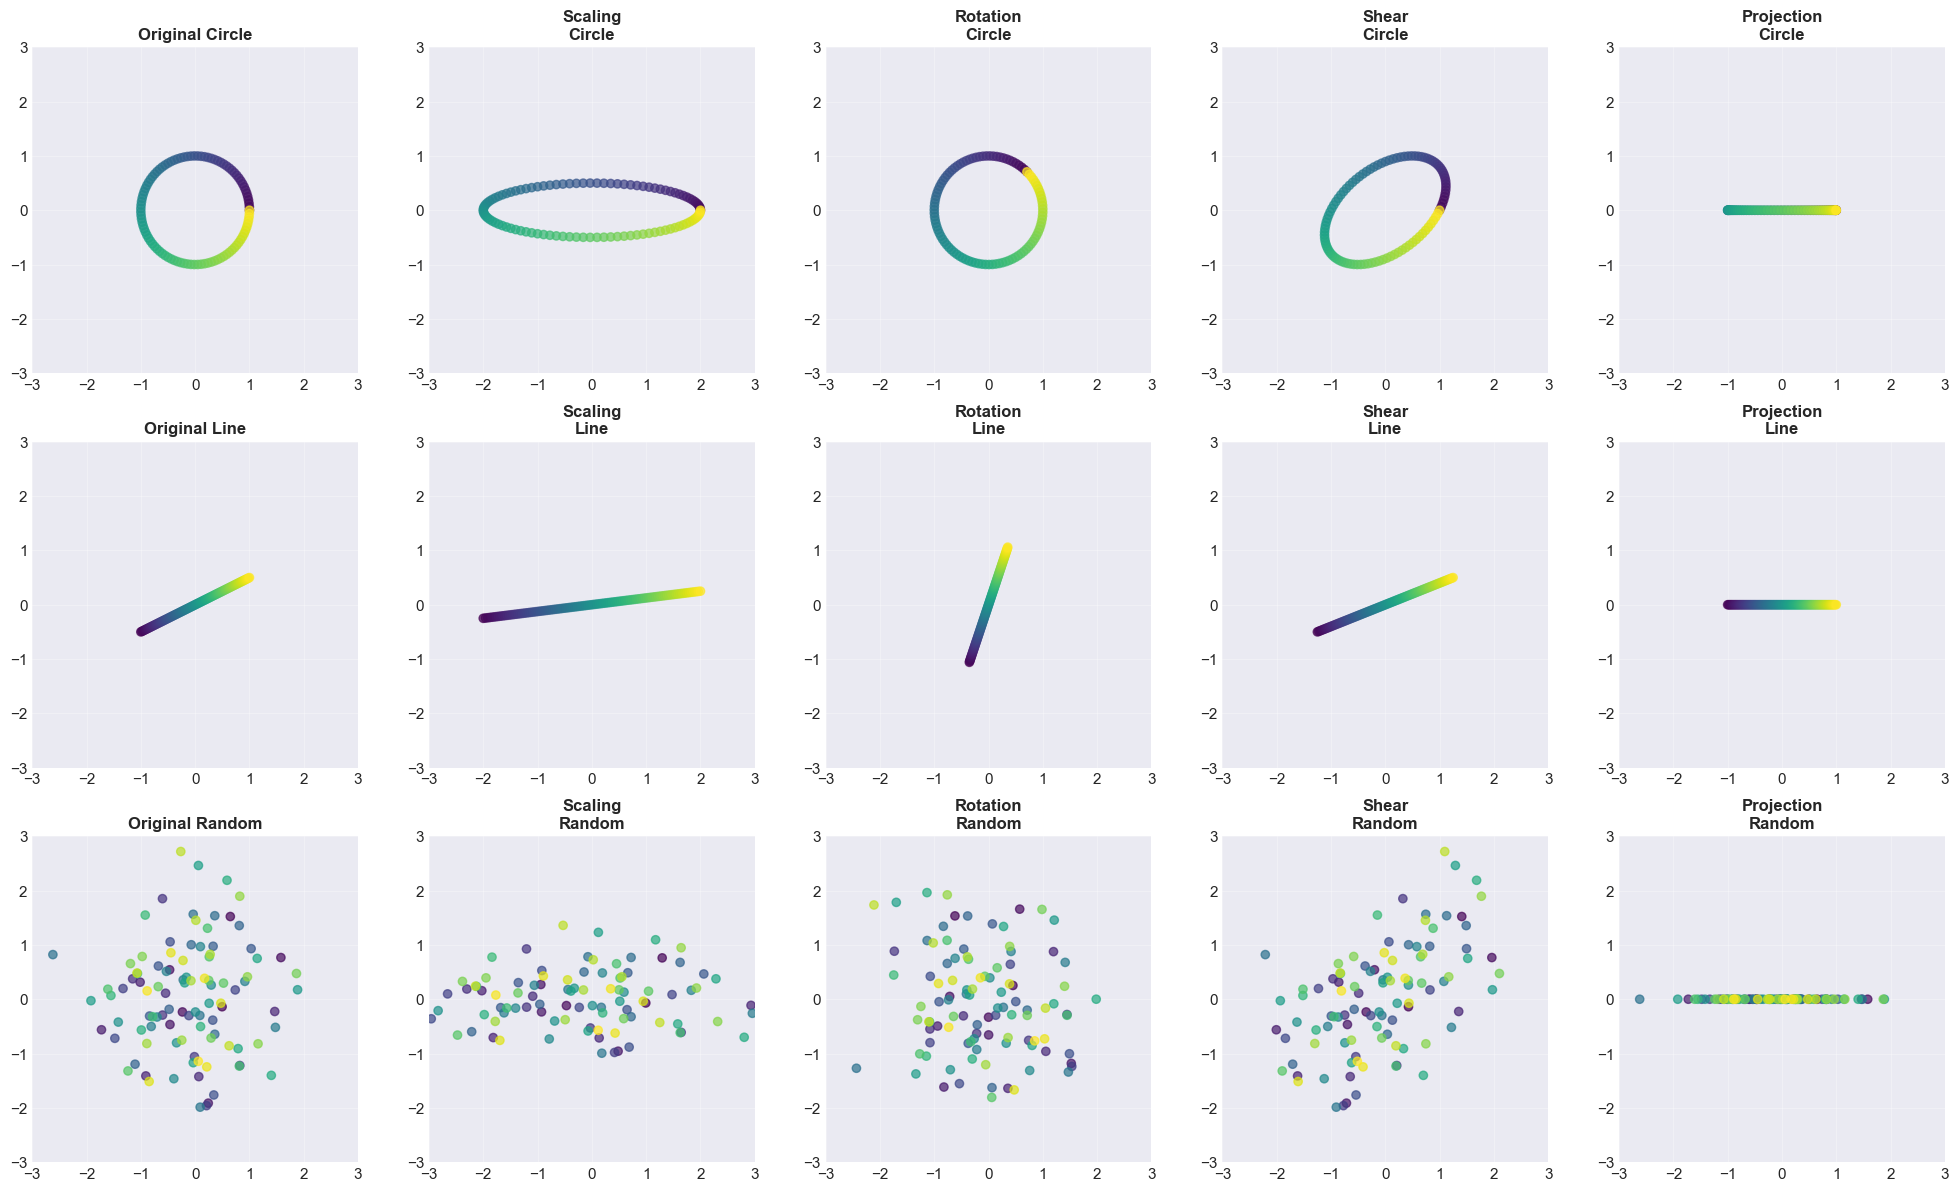

Transformation Analysis:

Scaling:
  Matrix: [[2.  0. ]
 [0.  0.5]]
  Determinant: 1.000

Rotation:
  Matrix: [[ 0.707 -0.707]
 [ 0.707  0.707]]
  Determinant: 1.000
  Effect: Contracts area by factor 1.00

Shear:
  Matrix: [[1.  0.5]
 [0.  1. ]]
  Determinant: 1.000

Projection:
  Matrix: [[1 0]
 [0 0]]
  Determinant: 0.000
  Effect: Collapses to lower dimension


In [31]:
def visualize_data_transformation():
    """
    Visualize how matrix multiplication transforms data patterns
    """
    # Generate synthetic 2D data with patterns
    np.random.seed(42)
    
    # Create different data patterns
    n_points = 100
    
    # Pattern 1: Circular
    theta = np.linspace(0, 2*np.pi, n_points)
    circle_data = np.column_stack([np.cos(theta), np.sin(theta)])
    
    # Pattern 2: Linear
    line_data = np.column_stack([np.linspace(-1, 1, n_points), 
                                np.linspace(-0.5, 0.5, n_points)])
    
    # Pattern 3: Random
    random_data = np.random.randn(n_points, 2)
    
    # Different transformation matrices
    transformations = {
        'Scaling': np.array([[2, 0], [0, 0.5]]),
        'Rotation': np.array([[0.707, -0.707], [0.707, 0.707]]),  # 45 degrees
        'Shear': np.array([[1, 0.5], [0, 1]]),
        'Projection': np.array([[1, 0], [0, 0]])  # Project onto x-axis
    }
    
    datasets = {
        'Circle': circle_data,
        'Line': line_data,
        'Random': random_data
    }
    
    fig, axes = plt.subplots(len(datasets), len(transformations) + 1, 
                            figsize=(20, 12))
    
    for row, (data_name, data) in enumerate(datasets.items()):
        # Plot original data
        axes[row, 0].scatter(data[:, 0], data[:, 1], c=range(n_points), 
                           cmap='viridis', alpha=0.7)
        axes[row, 0].set_title(f'Original {data_name}', fontsize=12, weight='bold')
        axes[row, 0].set_xlim(-3, 3)
        axes[row, 0].set_ylim(-3, 3)
        axes[row, 0].grid(True, alpha=0.3)
        axes[row, 0].set_aspect('equal')
        
        # Apply each transformation
        for col, (trans_name, trans_matrix) in enumerate(transformations.items()):
            # Transform data: (n_points, 2) @ (2, 2).T = (n_points, 2)
            transformed_data = data @ trans_matrix.T
            
            axes[row, col + 1].scatter(transformed_data[:, 0], transformed_data[:, 1], 
                                     c=range(n_points), cmap='viridis', alpha=0.7)
            axes[row, col + 1].set_title(f'{trans_name}\n{data_name}', 
                                       fontsize=12, weight='bold')
            axes[row, col + 1].set_xlim(-3, 3)
            axes[row, col + 1].set_ylim(-3, 3)
            axes[row, col + 1].grid(True, alpha=0.3)
            axes[row, col + 1].set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Print transformation details
    print("Transformation Analysis:")
    for name, matrix in transformations.items():
        det = np.linalg.det(matrix)
        print(f"\n{name}:")
        print(f"  Matrix: {matrix}")
        print(f"  Determinant: {det:.3f}")
        if det > 1:
            print(f"  Effect: Expands area by factor {det:.2f}")
        elif det < 1 and det > 0:
            print(f"  Effect: Contracts area by factor {det:.2f}")
        elif det == 0:
            print(f"  Effect: Collapses to lower dimension")
        elif det < 0:
            print(f"  Effect: Reflects and scales by factor {abs(det):.2f}")

visualize_data_transformation()

---

# 🎯 Key Takeaways

## 🔧 Matrix Multiplication Mechanics
- **Dot products in disguise**: Each element is a row-column dot product
- **Dimension rules**: $(m \times n) \times (n \times p) = (m \times p)$
- **Computational complexity**: $O(mnp)$ operations
- **Memory efficiency**: Batch processing enables vectorization

## 🧠 Neural Network Applications
- **Layer transformations**: Input → weights → output
- **Batch processing**: Process multiple samples simultaneously
- **Forward propagation**: Sequence of matrix multiplications
- **Parameter efficiency**: Shared weights across batch

## 📊 Mathematical Properties
- **Associative**: $(AB)C = A(BC)$ - enables efficient computation
- **Non-commutative**: $AB \neq BA$ - order matters!
- **Distributive**: $A(B+C) = AB + AC$ - enables optimization
- **Geometric**: Represents linear transformations

## 🚀 Performance Insights
- **Vectorization wins**: Batch >> sequential processing
- **Hardware optimization**: GPUs excel at matrix operations
- **Memory patterns**: Efficient cache usage
- **Parallel computation**: Multiple operations simultaneously
